In [1]:
import yfinance as yf
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

## Volumn 2: Day 1. Tickers and Properties

In [2]:
portfolio = ["COCO", "NFLX", "GOOGL", "MSFT", "AAPL"]
bench = "SPY"

In [3]:
def price_getter(ticker):
    port = yf.download(ticker, start = "2025-07-01", end = "", interval = "1d", auto_adjust = True, progress = False)["Close"]
    return port.dropna()

portfolio_price = price_getter(portfolio)
bench_price = price_getter(bench)
portfolio_price

Ticker,AAPL,COCO,GOOGL,MSFT,NFLX
Date,,,,,
2025-07-01,207.383377,36.810001,175.568024,490.324707,129.360001
2025-07-02,211.993668,37.189999,178.363693,489.368103,128.485992
2025-07-03,213.101334,37.560001,179.252319,497.090942,129.718002
2025-07-07,209.508896,38.389999,176.516556,495.974854,128.962006
2025-07-08,209.568771,37.560001,174.090317,494.878693,127.530998
...,...,...,...,...,...
2026-01-12,260.250000,55.650002,331.859985,477.179993,89.410004
2026-01-13,261.049988,55.279999,335.970001,470.670013,90.320000
2026-01-14,259.959991,51.990002,335.839996,459.380005,88.550003


# Returns for bench and portfolio:

In [4]:
def returns_price(portfolio):
    output = portfolio.pct_change()
    return output

portfolio_returns = returns_price(portfolio_price)
bench_returns = returns_price(bench_price)
portfolio_returns

Ticker,AAPL,COCO,GOOGL,MSFT,NFLX
Date,,,,,
2025-07-01,NaN,NaN,NaN,NaN,NaN
2025-07-02,0.022231,0.010323,0.015924,-0.001951,-0.006756
2025-07-03,0.005225,0.009949,0.004982,0.015781,0.009589
2025-07-07,-0.016858,0.022098,-0.015262,-0.002245,-0.005828
2025-07-08,0.000286,-0.021620,-0.013745,-0.002210,-0.011096
...,...,...,...,...,...
2026-01-12,0.003393,0.012370,0.010013,-0.004382,-0.000559
2026-01-13,0.003074,-0.006649,0.012385,-0.013643,0.010178
2026-01-14,-0.004175,-0.059515,-0.000387,-0.023987,-0.019597


In [5]:
bench_returns

Ticker,SPY
Date,
2025-07-01,NaN
2025-07-02,0.004533
2025-07-03,0.007881
2025-07-07,-0.007452
2025-07-08,-0.000548
...,...
2026-01-12,0.001570
2026-01-13,-0.001999
2026-01-14,-0.004915


#  Annual returns, Annual Volatility, Annual Sharpe & Max Drawdown

In [6]:
import numpy as np
rf_rates_annual = 0.04 # Annual rf_rates
rf_rates_daily = rf_rates_annual /252 # Daily rf_rates

In [7]:
def annual_data(portfolio):
    annual_ret = (1 + portfolio).prod()**(252/len(portfolio)) - 1
    annual_vol = portfolio.std() * np.sqrt(252)

    ####

    cumret = (1 + portfolio).cumprod()
    peak = cumret.cummax()
    drawdown = (cumret / peak - 1)
    max_dd = drawdown.min()
    
    ###

    ann_sharpe = ((portfolio.mean() - rf_rates_daily) / portfolio.std()) * np.sqrt(252)
    
    output = pd.DataFrame({"Annual Returns": annual_ret, "Annual Volatility": annual_vol, "Highest Drawdown": max_dd, "Annual Sharpe": ann_sharpe})
    return output 
portfolio_ind_stocks_annual = annual_data(portfolio_returns)
bench_stock_annual = annual_data(bench_returns)

portfolio_ind_stocks_annual

,Annual Returns,Annual Volatility,Highest Drawdown,Annual Sharpe
Ticker,,,,
AAPL,0.460079,0.209985,-0.107132,1.729674
COCO,0.972376,0.403172,-0.177699,1.800351
GOOGL,2.139586,0.273029,-0.082012,4.217003
MSFT,-0.109786,0.178096,-0.155986,-0.793651
NFLX,-0.502650,0.292805,-0.321605,-2.387580


## Remember: rf_rates ALWAYS NEED TO BE TRANSFERED into ANNUAL RF_RATES for annual data

# Day 2: Portfolio and Bench Weighs

In [8]:
Weights = {"MSFT":0.25,"GOOGL": 0.25, "COCO": 0.20, "NFLX":0.15, "AAPL": 0.15}
Bench_weights = {"SPY": 1}
w = pd.Series(Weights)
b_w = pd.Series(Bench_weights)
w

MSFT     0.25
GOOGL    0.25
COCO     0.20
NFLX     0.15
AAPL     0.15
dtype: float64

In [9]:
def portfolio_ret(portfolio, w):
    r = portfolio[w.index].dropna()
    r = r.dot(w)
    return r
    ### End of Returns
P_ret = portfolio_ret(portfolio_returns, w)
B_ret = portfolio_ret(bench_returns, b_w)

def compressed_annual(df):
    annual_ret = (1 + df).prod() ** (252/len(df)) - 1
    annual_vol = df.std() * np.sqrt(252)

    ###

    ann_sharpe = (df.mean() - rf_rates_daily) / df.std()

    ### 
    cumret = (1 + df).cumprod()
    peak = cumret.cummax()
    dd = cumret/peak - 1
    max_dd = dd.min()

    ###
    
    output = {"Annual Returns": annual_ret, "Annual Volatility": annual_vol, "Highest Drawdown": max_dd, "Annual Sharpe": ann_sharpe}
    return output

Portfolio_annual = compressed_annual(P_ret)  # We need to create a copy since we can only use the series to create the final visualization, not the complete DF
#
Portfolio_annual_copy = Portfolio_annual.copy()
Portfolio_annual_copy = pd.DataFrame(Portfolio_annual_copy, index = ["Portfolio"])
#
Portfolio_annual_copy

,Annual Returns,Annual Volatility,Highest Drawdown,Annual Sharpe
Portfolio,0.455558,0.153267,-0.061622,0.142739


In [10]:
def portfolio_ret(portfolio, w):
    r = portfolio[w.index].dropna()
    r = r.dot(w)
    return r
    ### End of Returns
P_ret = portfolio_ret(portfolio_returns, w)

    ### Portfolio prices 
def P_price(price, w):
    p = price[w.index].dropna()
    p = p.dot(w)
    return p
P_price = P_price(portfolio_price, w)
                    

    ### 
sma_exp = P_price.expanding().mean()
sma20 = P_price.rolling(20).mean().combine_first(sma_exp)
sma60 = P_price.rolling(60).mean().combine_first(sma_exp)
sma90 = P_price.rolling(90).mean().combine_first(sma_exp)

rolling_sharpe_60 = ((P_ret.rolling(60).mean() - rf_rates_daily)/ P_ret.rolling(60).std()) * np.sqrt(252)

    ### End of Rollings
p_cumret = (1 + P_ret).cumprod()
peak = p_cumret.cummax()
drawdown = (p_cumret/peak) - 1

portfolio_panel = pd.DataFrame({"Portfolio Returns": P_ret, "Portfolio Cumret": p_cumret, "Portfolio Drawdown": drawdown, "SMA20d": sma20, "SMA60d": sma60, "SMA90d": sma90, "Rolling Sharpe 60d": rolling_sharpe_60})

portfolio_panel

,Portfolio Returns,Portfolio Cumret,Portfolio Drawdown,SMA20d,SMA60d,SMA90d,Rolling Sharpe 60d
Date,,,,,,,
2025-07-01,NaN,NaN,NaN,224.346690,224.346690,224.346690,NaN
2025-07-02,0.007879,1.007879,0.000000,224.894794,224.894794,224.894794,NaN
2025-07-03,0.009403,1.017356,0.000000,225.936768,225.936768,225.936768,NaN
2025-07-07,-0.003360,1.013937,-0.003360,226.095448,226.095448,226.095448,NaN
2025-07-08,-0.009934,1.003864,-0.013261,225.940202,225.940202,225.940202,NaN
...,...,...,...,...,...,...,...
2026-01-12,0.004307,1.256970,-0.032590,263.848326,263.881413,259.999104,2.079807
2026-01-13,0.000344,1.257402,-0.032257,263.925026,264.078824,260.203956,2.023070
2026-01-14,-0.021562,1.230290,-0.053124,263.911601,264.179682,260.393041,1.262706


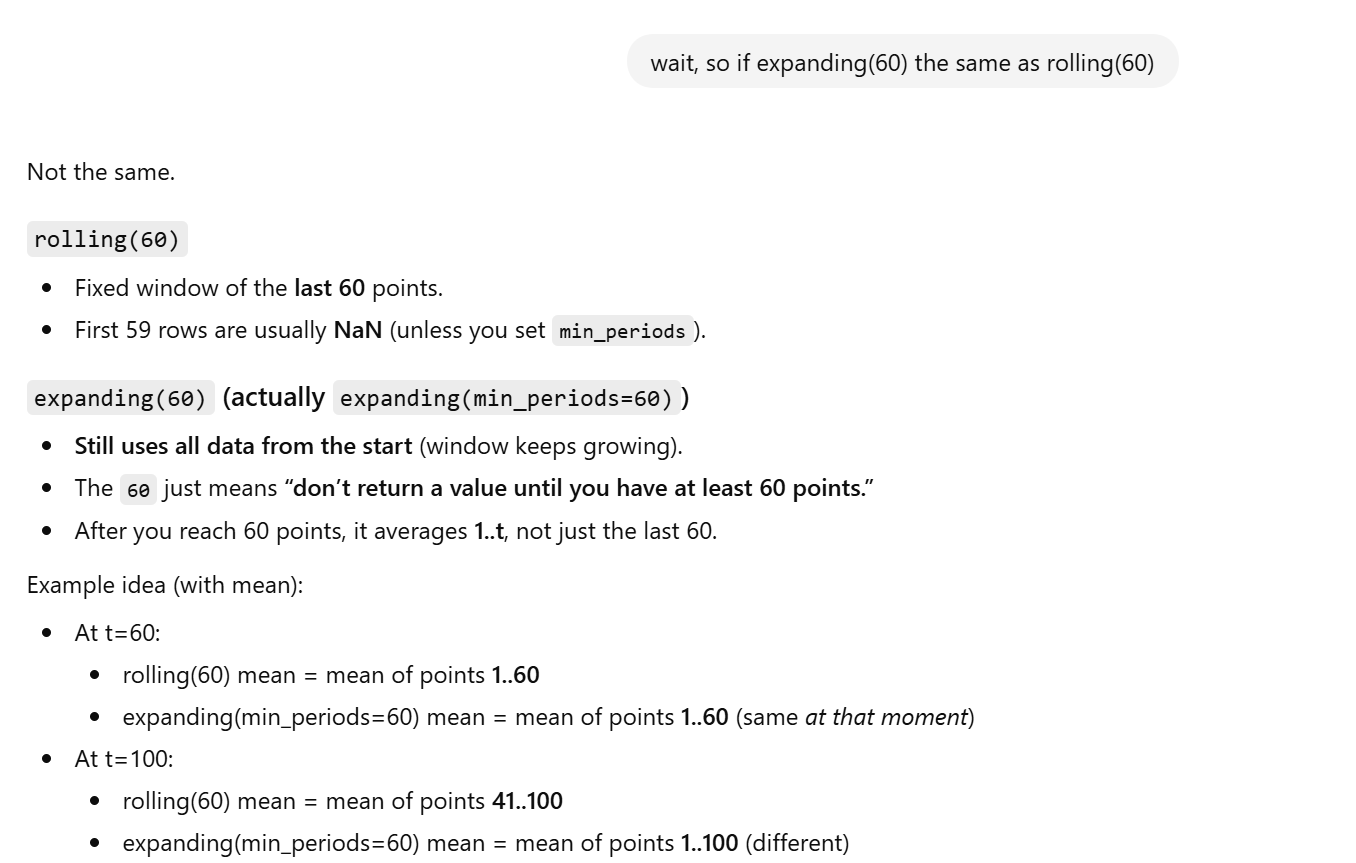


# Day 3: Beta, IR, TE, & Alpha (P v B correlation)

In [11]:
P_ret = pd.DataFrame(portfolio_ret(portfolio_returns, w))
P_ret = P_ret.rename(columns={0: "Portfolio"})
P_ret

,Portfolio
Date,
2025-07-02,0.007879
2025-07-03,0.009403
2025-07-07,-0.003360
2025-07-08,-0.009934
2025-07-09,0.004782
...,...
2026-01-12,0.004307
2026-01-13,0.000344
2026-01-14,-0.021562


In [12]:
B_ret = pd.DataFrame(B_ret)
B_ret = B_ret.rename(columns={0: "Benchmark"})
B_ret

,Benchmark
Date,
2025-07-02,0.004533
2025-07-03,0.007881
2025-07-07,-0.007452
2025-07-08,-0.000548
2025-07-09,0.005997
...,...
2026-01-12,0.001570
2026-01-13,-0.001999
2026-01-14,-0.004915


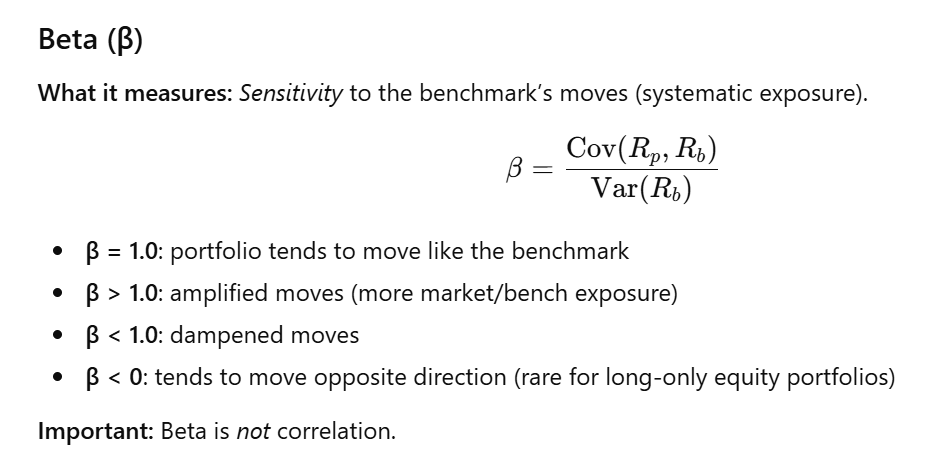
## Beta is used to distinguish the portfolio movements when the benchmark moves -> (if beta is below 0, the portfolio will likely move opposite to the benchmark and vice versa!!

In [13]:
Excess_returns = Active_returns = P_ret["Portfolio"] - B_ret["Benchmark"]

TE = Excess_returns.std() * np.sqrt(252)
IR = (Excess_returns.mean()/ TE) * np.sqrt(252) # Information Ratio for active portfolio management.

    # End of TE and IR #

ex_p = P_ret["Portfolio"] - rf_rates_daily
ex_b = B_ret["Benchmark"] - rf_rates_daily

beta = ex_p.cov(ex_b)/ ex_b.var()

alpha_daily = ex_p.mean() - (rf_rates_daily + beta * ex_b.mean())
alpha_annual = alpha_daily * 252

P_vs_B = {"Beta": beta, "Annual Alpha": alpha_annual, "Tracking Errors": TE, "Information Ratio": IR}
#
P_vs_B_copy = P_vs_B.copy()
P_vs_B_copy = pd.DataFrame(P_vs_B_copy, index = ["Portfolio"]) # We need to create a copy since we can only use the series to create the final visualization, not the complete DF
#
P_vs_B_copy
# NOTE -> Negative alpha  = portfolio underperformed compared to the predicted return
#      -> Positive alpha = portfolio performed stronger compared to the predicted return
# Predicted return = (rf_rates_daily + beta * ex_b.mean())

,Beta,Annual Alpha,Tracking Errors,Information Ratio
Portfolio,0.859339,0.150258,0.124466,0.083284


# Information Ratio
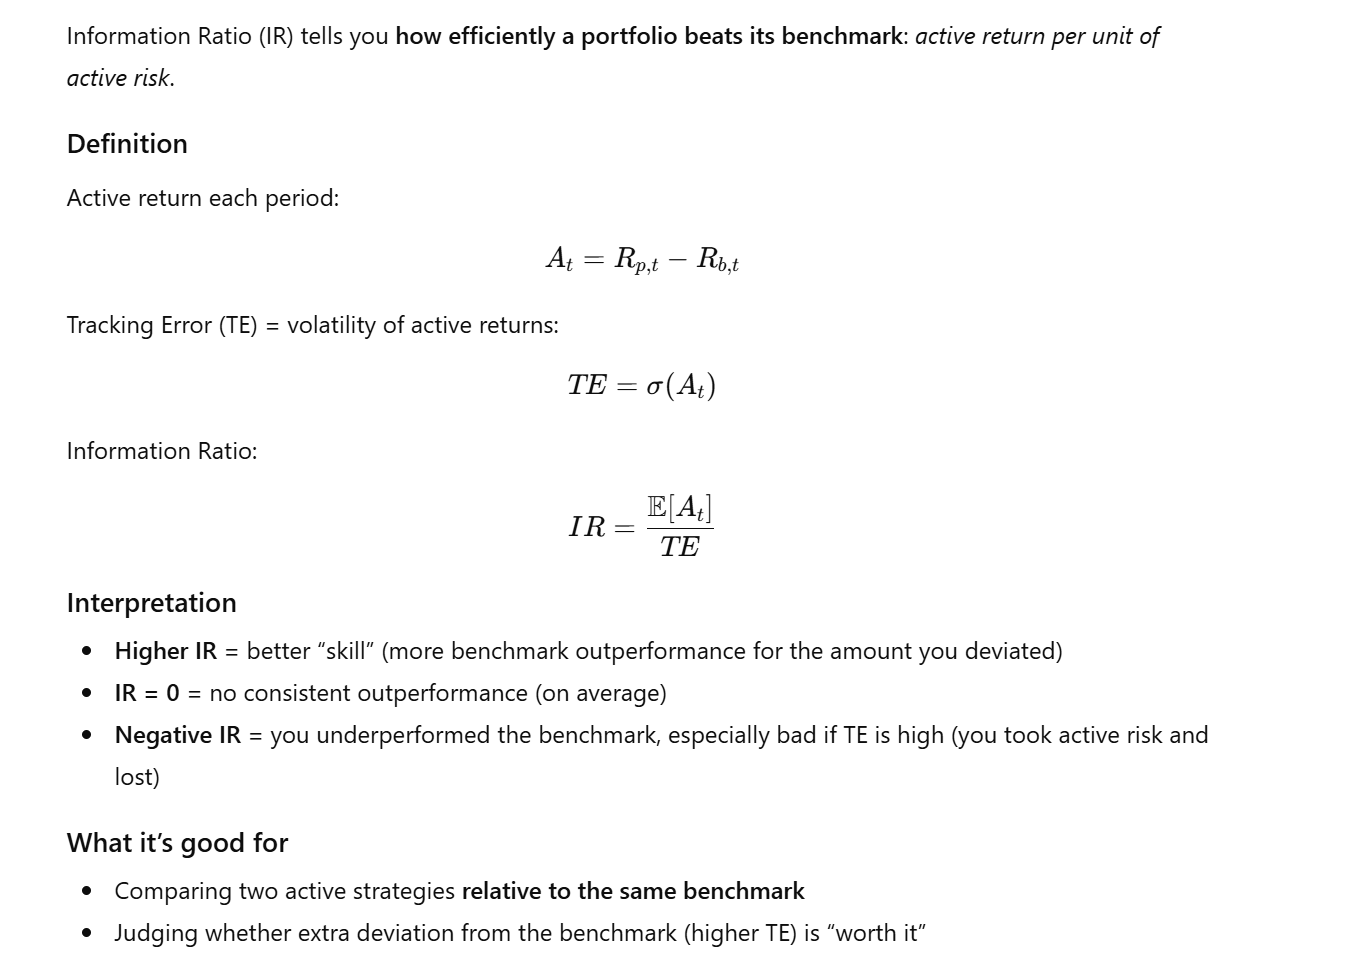

# Day 4: Visualizing

In [14]:
portfolio_panel

,Portfolio Returns,Portfolio Cumret,Portfolio Drawdown,SMA20d,SMA60d,SMA90d,Rolling Sharpe 60d
Date,,,,,,,
2025-07-01,NaN,NaN,NaN,224.346690,224.346690,224.346690,NaN
2025-07-02,0.007879,1.007879,0.000000,224.894794,224.894794,224.894794,NaN
2025-07-03,0.009403,1.017356,0.000000,225.936768,225.936768,225.936768,NaN
2025-07-07,-0.003360,1.013937,-0.003360,226.095448,226.095448,226.095448,NaN
2025-07-08,-0.009934,1.003864,-0.013261,225.940202,225.940202,225.940202,NaN
...,...,...,...,...,...,...,...
2026-01-12,0.004307,1.256970,-0.032590,263.848326,263.881413,259.999104,2.079807
2026-01-13,0.000344,1.257402,-0.032257,263.925026,264.078824,260.203956,2.023070
2026-01-14,-0.021562,1.230290,-0.053124,263.911601,264.179682,260.393041,1.262706


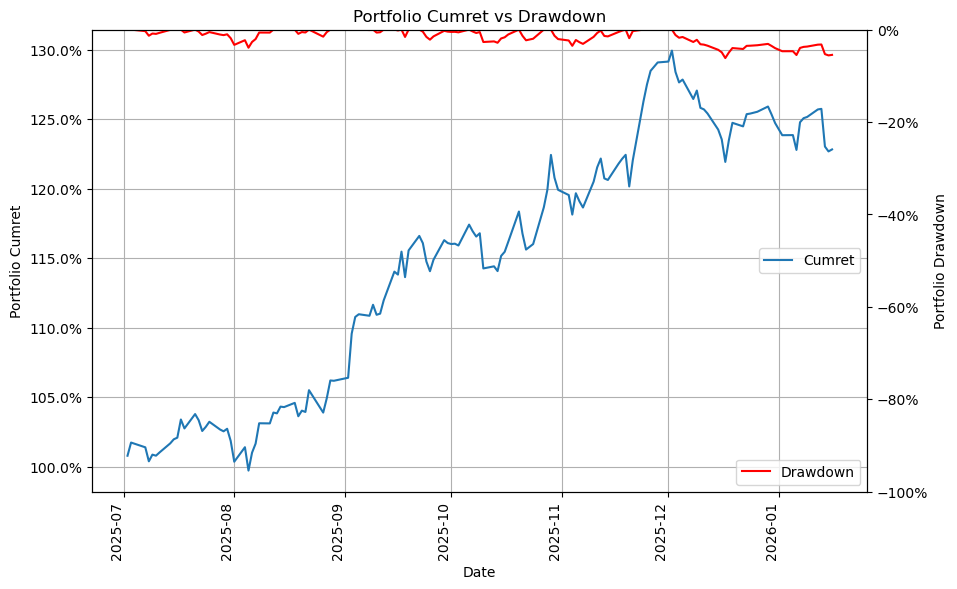

In [15]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(figsize = (10,6))

sns.lineplot(data = portfolio_panel, x = portfolio_panel.index, y = "Portfolio Cumret", ax = ax, label  = "Cumret")
ax.yaxis.set_major_formatter(PercentFormatter(1))

ax2 = ax.twinx()

sns.lineplot(data = portfolio_panel, x = portfolio_panel.index, y = "Portfolio Drawdown", ax = ax2, color = "red", label = "Drawdown")
ax2.yaxis.set_major_formatter(PercentFormatter(1))
ax2.set_ylim(-1, 0) # set so that the y range for dd is bigger = cleaner look



ax.legend(loc='center right')
ax2.legend(loc='lower right')

plt.setp(ax.get_xticklabels(), rotation = 90, ha = "right")
plt.title("Portfolio Cumret vs Drawdown")
ax.grid()
plt.show()

# NOTE: The cell below is used to visualize the data we gathered IN THE SHORT TERM ONLY (3mo, 4mo, etc.). -> WE CAN KEEP THE DAILY RETURNS, no need to convert into months

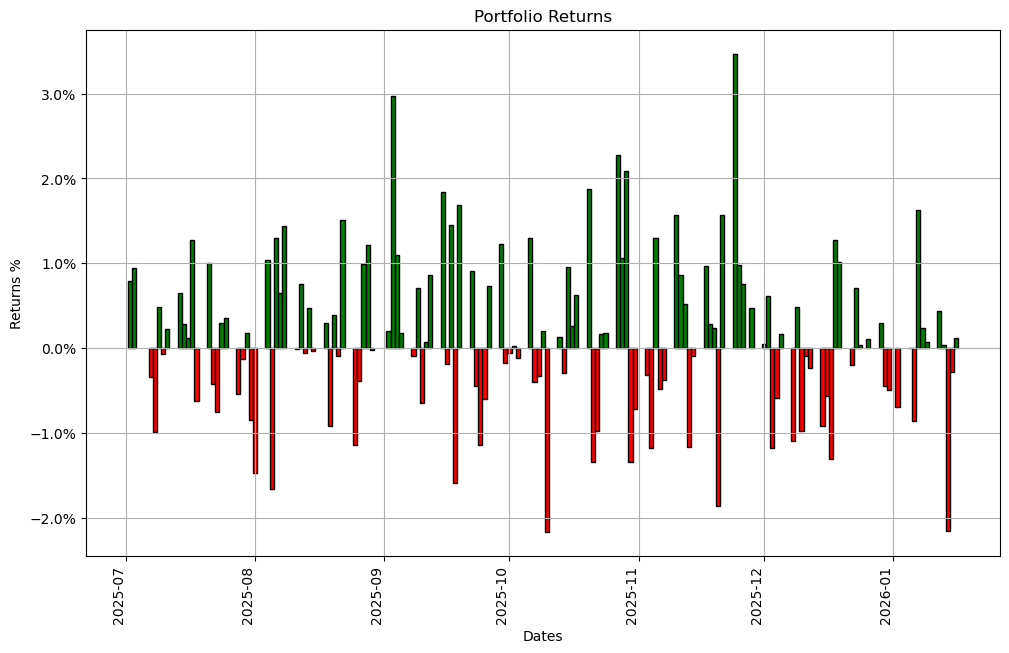

In [16]:
fig, ax = plt.subplots(figsize = (10,6))

tmp = portfolio_panel.copy()

tmp["sign"] = np.where(tmp["Portfolio Returns"] > 0, "green", "red")

###

ax.bar(data = portfolio_panel, x = portfolio_panel.index, height = "Portfolio Returns", color = tmp["sign"], width = 1, edgecolor = "black")
ax.yaxis.set_major_formatter(PercentFormatter(1))

plt.grid()

plt.title("Portfolio Returns")
plt.tight_layout()

plt.xlabel("Dates")
plt.ylabel("Returns %")

plt.setp(ax.get_xticklabels(), rotation = 90, ha = "right")
plt.show()


### Alternate of np.where(tmp["Portfolio Returns" > 0, "green", "red")
#### for i in range(len(tmp)):
####  if tmp["Portfolio Returns"].iloc[i] > 0:
####       tmp["sign"].iloc[i] = "green"
####  else:
####      tmp["sign"].iloc[i] = "red"
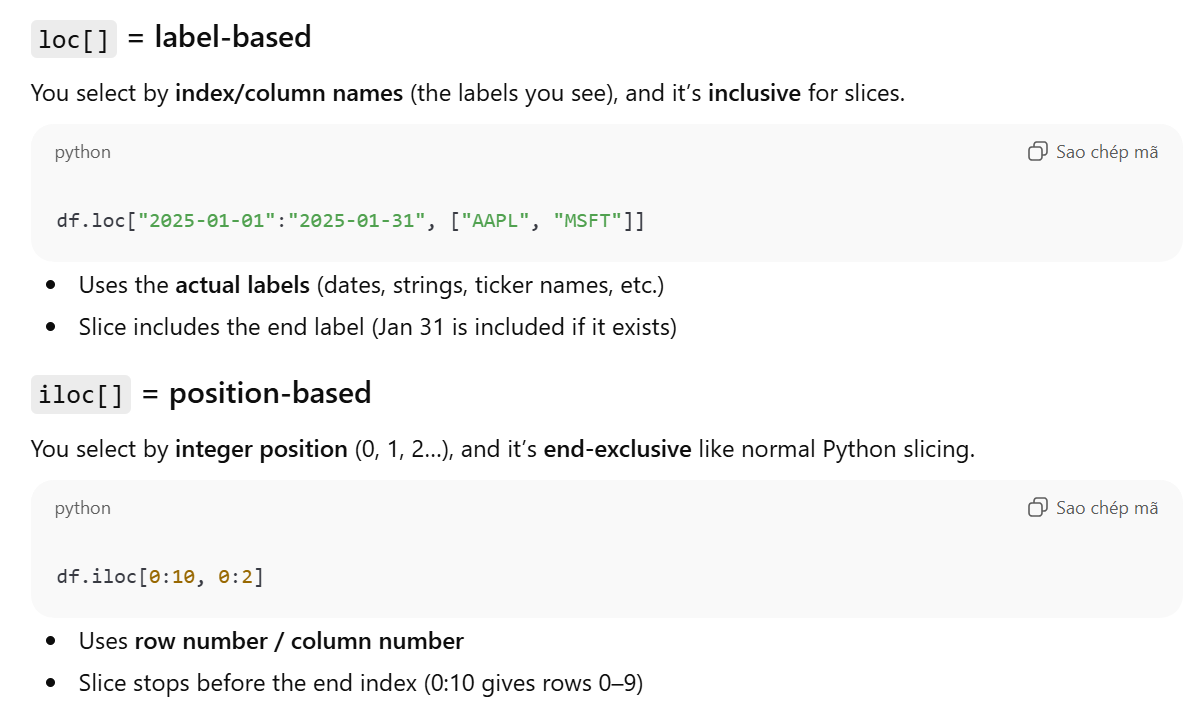

# IMPORTANT ADDITION: The cell below is ONLY USED IF we are analyzing datas with long range (3 years, 4 years, etc.) -> we will be converting said data into months, not daily for better visualization

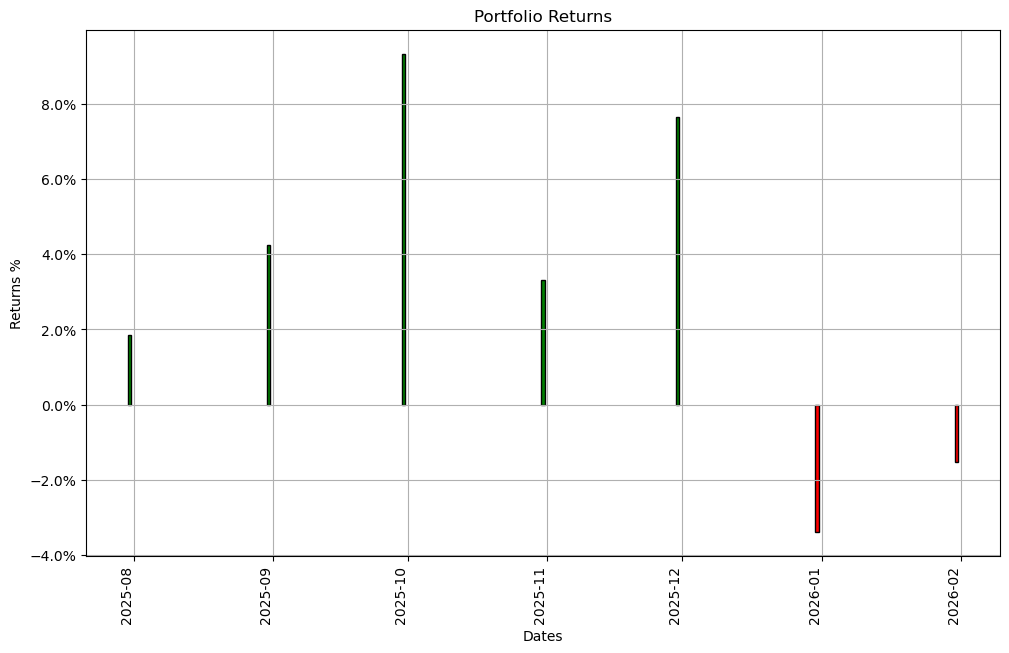

In [17]:
fig, ax = plt.subplots(figsize = (10,6))

tmp = portfolio_panel.copy()

###

P_ret_monthly = (1 + tmp["Portfolio Returns"]).resample("ME").prod() - 1 # TOTAL COMPOUNDED returns for that month
P_ret_monthly = pd.DataFrame(P_ret_monthly)
P_ret_monthly["sign"] = np.where(P_ret_monthly["Portfolio Returns"] > 0, "green", "red")

###

ax.bar(data = P_ret_monthly, x = P_ret_monthly.index, height = "Portfolio Returns", color = P_ret_monthly["sign"], width = 0.75, edgecolor = "black")
ax.yaxis.set_major_formatter(PercentFormatter(1))

plt.title("Portfolio Returns")
plt.tight_layout()

plt.xlabel("Dates")
plt.ylabel("Returns %")
plt.grid()

plt.setp(ax.get_xticklabels(), rotation = 90, ha = "right")
plt.show()



<Figure size 1000x600 with 0 Axes>

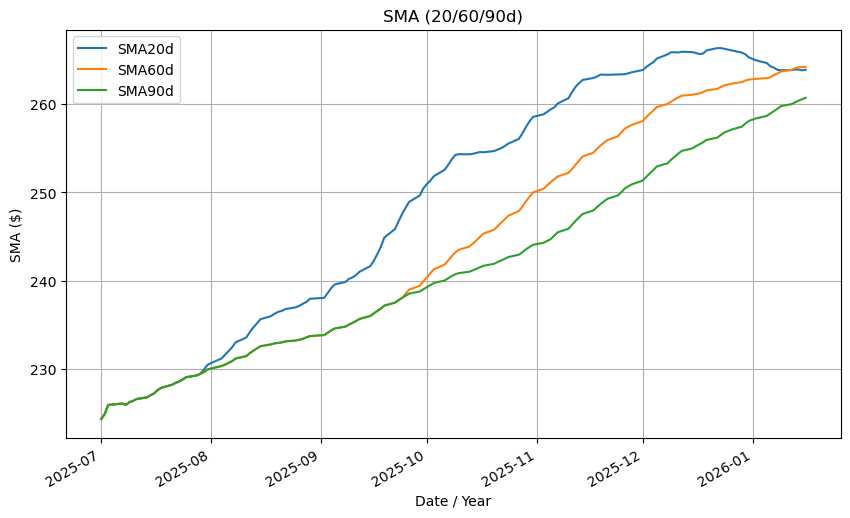

In [18]:
plt.figure(figsize = (10,6))

SMA = portfolio_panel[["SMA20d", "SMA60d", "SMA90d"]].plot.line(figsize = (10,6)) # Pandas plot

SMA.set_title("SMA (20/60/90d)")

SMA.grid()
SMA.set_xlabel("Date / Year")
SMA.set_ylabel("SMA ($)")


plt.show()


# Day 6: New Portfolio

In [19]:
ticker_new = ["VOO", "VXUS", "SCHD", "GLD", "NVDA", "META", "SLB"]

def new_portfolio(ticker_new):
    output = yf.download(ticker_new, start = "2025-07-01", end = "", interval = "1d", auto_adjust = True, progress = False)["Close"]
    return output
new_portfolio_price = new_portfolio(ticker_new)
new_portfolio_price

Ticker,GLD,META,NVDA,SCHD,SLB,VOO,VXUS
Date,,,,,,,
2025-07-01,307.549988,718.149170,153.282837,26.522070,34.646835,564.553162,67.532158
2025-07-02,309.250000,712.507568,157.232376,26.776997,35.345680,567.058899,67.747139
2025-07-03,307.140015,717.939514,159.322144,26.816217,35.089767,571.960938,67.903481
2025-07-07,307.369995,717.280457,158.222275,26.531876,34.400768,567.377075,67.063118
2025-07-08,304.160004,719.596985,159.982071,26.786800,35.965782,566.999207,67.493073
...,...,...,...,...,...,...,...
2026-01-12,422.230011,641.969971,184.940002,28.500000,45.150002,639.340027,78.550003
2026-01-13,421.630005,631.090027,185.809998,28.620001,45.900002,638.030029,78.129997
2026-01-14,425.940002,615.520020,183.139999,29.040001,46.970001,634.940002,78.470001


In [20]:
def new_pret(portfolio):
    output = portfolio.pct_change()
    return output
ind_stocks_ret = new_pret(new_portfolio_price)
ind_stocks_ret

Ticker,GLD,META,NVDA,SCHD,SLB,VOO,VXUS
Date,,,,,,,
2025-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-07-02,0.005528,-0.007856,0.025766,0.009612,0.020171,0.004438,0.003183
2025-07-03,-0.006823,0.007624,0.013291,0.001465,-0.007240,0.008645,0.002308
2025-07-07,0.000749,-0.000918,-0.006903,-0.010603,-0.019635,-0.008014,-0.012376
2025-07-08,-0.010443,0.003230,0.011122,0.009608,0.045494,-0.000666,0.006411
...,...,...,...,...,...,...,...
2026-01-12,0.018723,-0.016982,0.000433,-0.001751,-0.001106,0.001614,0.009251
2026-01-13,-0.001421,-0.016948,0.004704,0.004211,0.016611,-0.002049,-0.005347
2026-01-14,0.010222,-0.024672,-0.014370,0.014675,0.023312,-0.004843,0.004352


# Weigh and Annual properties of new portfolio

In [21]:
new_Weights = {"VOO": 0.2, "VXUS": 0.15, "SCHD": 0.20, "GLD": 0.10, "NVDA": 0.10, "META": 0.10, "SLB": 0.15}
new_w = pd.Series(new_Weights)

In [22]:
def new_pfull_ret(portfolio, w):
    output = ind_stocks_ret[w.index].dropna()
    output = output.dot(w)
    return output
new_p_return = new_pfull_ret(ind_stocks_ret, new_w)
new_p_return

Date
2025-07-02    0.008657
2025-07-03    0.002691
2025-07-07   -0.009232
2025-07-08    0.009965
2025-07-09    0.004376
                ...   
2026-01-12    0.001412
2026-01-13    0.000756
2026-01-14    0.003234
2026-01-15    0.001811
2026-01-16   -0.001479
Length: 138, dtype: float64

In [23]:
def new_p_annual(portfolio_ret):

    annual_ret = (1 + portfolio_ret).prod() ** (252/len(portfolio_ret)) - 1
    annual_vol = portfolio_ret.std() * np.sqrt(252)

    ###

    cumret = (1 + portfolio_ret).cumprod()
    peak = cumret.cummax()
    dd = cumret / peak - 1
    max_drawdown = dd.min()

    ###

    annual_sharpe = (portfolio_ret.mean() - rf_rates_daily) / portfolio_ret.std()
    output = {"New Annual Returns": annual_ret, "New Annual Volatility": annual_vol, "New Highest Drawdown": max_drawdown, "New Annual Sharpe": annual_sharpe}
    return output
    
new_annual_data = new_p_annual(new_p_return)
new_annual_copy = new_annual_data.copy()  # We need to create a copy since we can only use the series to create the final visualization, not the complete DF
#
new_annual_copy = pd.DataFrame(new_annual_copy, index = ["New Portfolio"])
new_annual_copy

,New Annual Returns,New Annual Volatility,New Highest Drawdown,New Annual Sharpe
New Portfolio,0.324922,0.112613,-0.055969,0.13862


# Bench Correlation:

In [24]:
new_P_ret = pd.DataFrame(new_p_return)
new_P_ret = new_P_ret.rename(columns = {0:"New Portfolio Returns"})
new_P_ret

,New Portfolio Returns
Date,
2025-07-02,0.008657
2025-07-03,0.002691
2025-07-07,-0.009232
2025-07-08,0.009965
2025-07-09,0.004376
...,...
2026-01-12,0.001412
2026-01-13,0.000756
2026-01-14,0.003234


In [25]:
active_ret = excess_ret = new_P_ret["New Portfolio Returns"] - B_ret["Benchmark"]
    
    ###

TE = active_ret.std() * np.sqrt(252)
IR = (active_ret.mean() / TE) * np.sqrt(252)

    ###
above_rf_p_rate = new_P_ret["New Portfolio Returns"] - rf_rates_daily
above_rf_b_rate = B_ret["Benchmark"] - rf_rates_daily

beta = above_rf_p_rate.cov(above_rf_b_rate) / above_rf_b_rate.var()

alpha_daily = above_rf_p_rate.mean() - (rf_rates_daily + beta * ex_b.mean())
alpha_annual = alpha_daily * 252

    ###

new_pvs_b = {"Tracking Errors": TE, "Information Ratio": IR, "Beta": beta, "Annual Alpha": alpha_annual}
#
new_pvs_b_copy = new_pvs_b.copy()
new_pvs_b_copy = pd.DataFrame(new_pvs_b_copy, index = ["New Portfolio"])
# We need to create a copy since we can only use the series to create the final visualization, not the complete DF
new_pvs_b_copy
                              

,Tracking Errors,Information Ratio,Beta,Annual Alpha
New Portfolio,0.067287,0.06092,0.866299,0.049503


# Important notes: Only when we use a series to create the scalar value can we IMPORT AN INDEX. Series example:
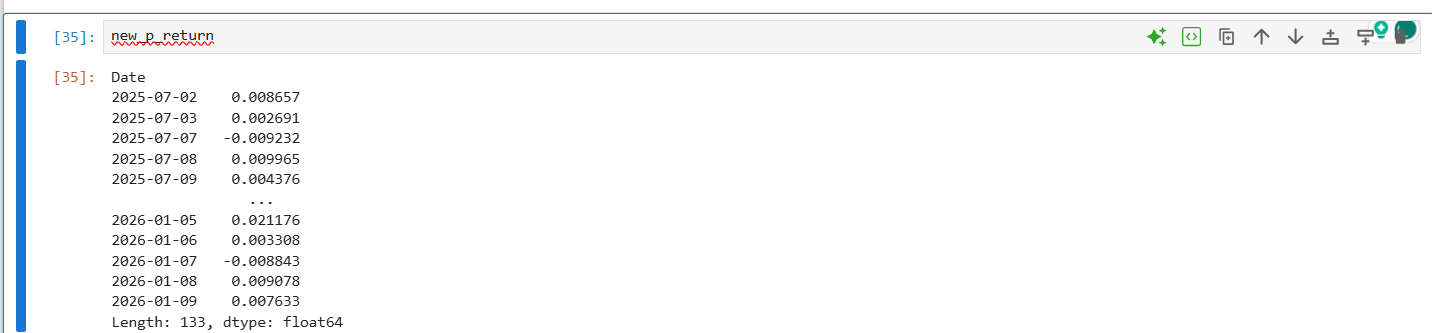
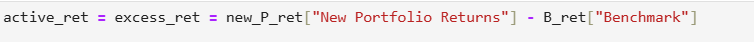

# Day 7: Comparison

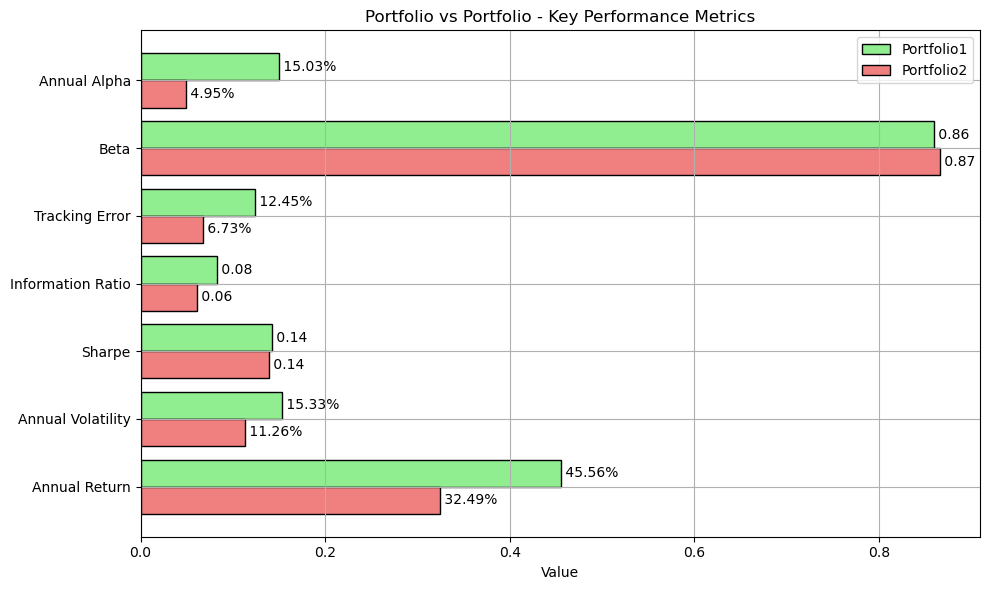

In [26]:
Portfolio1 = {"Annual Return": Portfolio_annual["Annual Returns"], 
              "Annual Volatility": Portfolio_annual["Annual Volatility"], 
              "Sharpe": Portfolio_annual["Annual Sharpe"], 
              "Information Ratio": P_vs_B["Information Ratio"],
              "Tracking Error": P_vs_B["Tracking Errors"],
              "Beta": P_vs_B["Beta"],
              "Annual Alpha": P_vs_B["Annual Alpha"]}
Portfolio1 = pd.DataFrame(Portfolio1, index = ["Portfolio1"])

Portfolio2 = {"Annual Return": new_annual_data["New Annual Returns"], 
              "Annual Volatility": new_annual_data["New Annual Volatility"], 
              "Sharpe": new_annual_data["New Annual Sharpe"], 
              "Information Ratio": new_pvs_b["Information Ratio"],
              "Tracking Error": new_pvs_b["Tracking Errors"],
              "Beta": new_pvs_b["Beta"],
              "Annual Alpha": new_pvs_b["Annual Alpha"]}

Portfolio2 = pd.DataFrame(Portfolio2, index = ["Portfolio2"])

Metrics_order = ["Annual Return",
                 "Annual Volatility",
                 "Sharpe",
                 "Information Ratio",
                 "Tracking Error",
                 "Beta",
                 "Annual Alpha"]
            ####


combined = pd.concat([Portfolio1, Portfolio2])
combined = combined.reindex(columns = Metrics_order)

plot_df = combined.T

h = 0.4 # thickness of the bars
y = np.arange(len(plot_df)) # this code produces "array([0, 1, 2, 3, 4, 5, 6])" -> lenght of plot_df
                            # help place the bars in their necessary positions (+ h/2 or - h/2)

####

fig, ax = plt.subplots(figsize = (10,6))

ax.barh(y + h/2, plot_df["Portfolio1"], height = h, label = "Portfolio1", color = "lightgreen", edgecolor = "black")
ax.barh(y - h/2, plot_df["Portfolio2"], height = h, label = "Portfolio2", color = "lightcoral", edgecolor = "black")

ax.set_xlabel("Value")
ax.set_title("Portfolio vs Portfolio - Key Performance Metrics")
ax.legend(loc = "upper right")
ax.grid()

###
ax.set_yticks(y)                  # Tells matplotlib where the ticks should be placed, in this case -> follow the array produced by np.arange(len(plot_df)) 
ax.set_yticklabels(Metrics_order) # Pair y ticks with metrics instead of random numeric counter.

###
# Formatter
fmt = {
    "Annual Return": "{:.2%}",
    "Annual Volatility": "{:.2%}",
    "Annual Alpha": "{:.2%}",
    "Tracking Error": "{:.2%}",
    "Sharpe": "{:.2f}",
    "Beta": "{:.2f}",
    "Information Ratio": "{:.2f}",
}

def fmt_value(metric,v):
    return fmt[metric].format(float(v)) # -> formatting
    
for i, Metrics_order in enumerate(plot_df.index): # plot_df.index is the list of metric names.
    p1 = plot_df.loc[Metrics_order, "Portfolio1"] # For the current metric, pull the numeric value of the Portfolio1 bar
    p2 = plot_df.loc[Metrics_order, "Portfolio2"] # For the current metric, pull the numeric value of the Portfolio2 bar
    ax.text(p1, i + h/2, " " + fmt_value(Metrics_order, p1), va="center") 
    ax.text(p2, i - h/2, " " + fmt_value(Metrics_order, p2), va="center")
    
# i above is used to identify the location of each numerical data -> similar to y + - h/2
# NOTE: " " is to add a space from the bar and add in the value (fmt_value(metrics_order,b))

# p1, p2 is used to pull the variable and the location on the x-axis (aka. at the end of the graph ) => kinda like how ax.barh() work with their x value

plt.tight_layout()
plt.show()

# Note: pattern for df.loc -> df.loc[row_selector, col_selector]

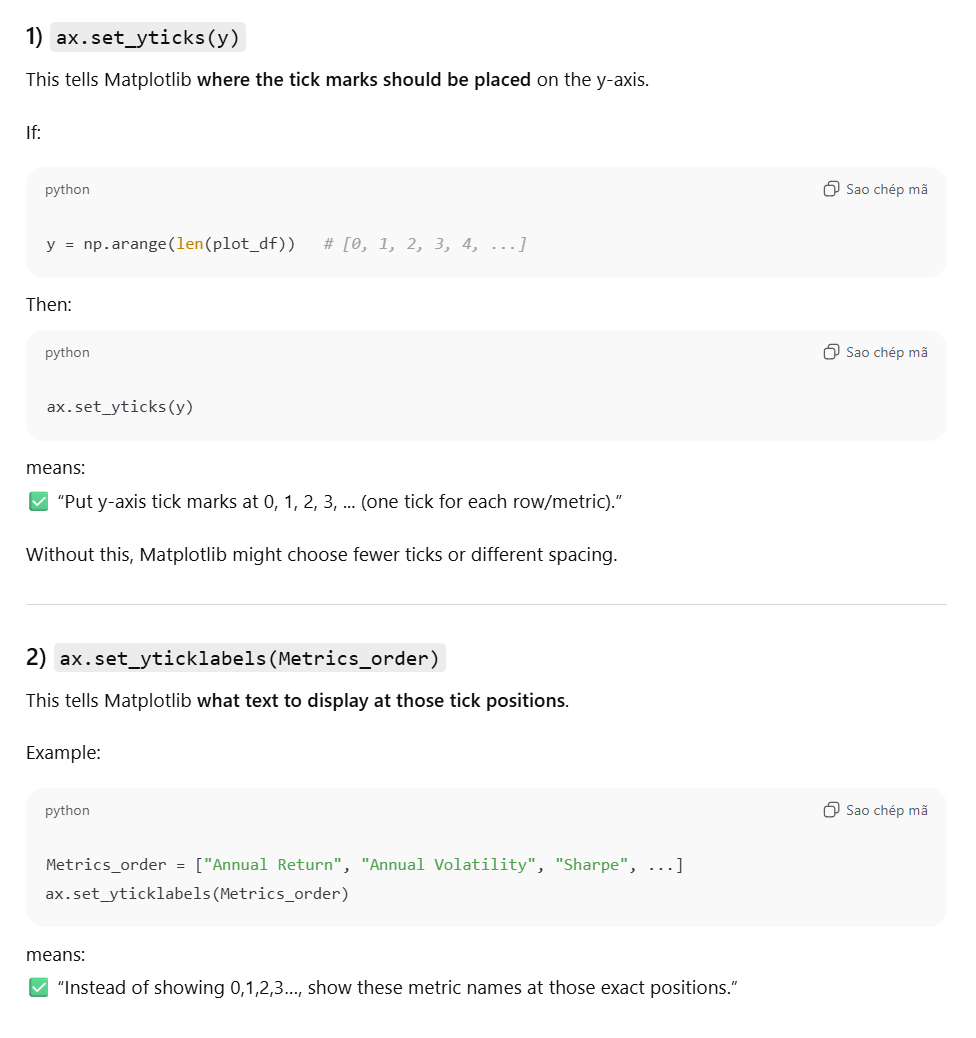
##
# !!! ENUMERATE USAGE !!!
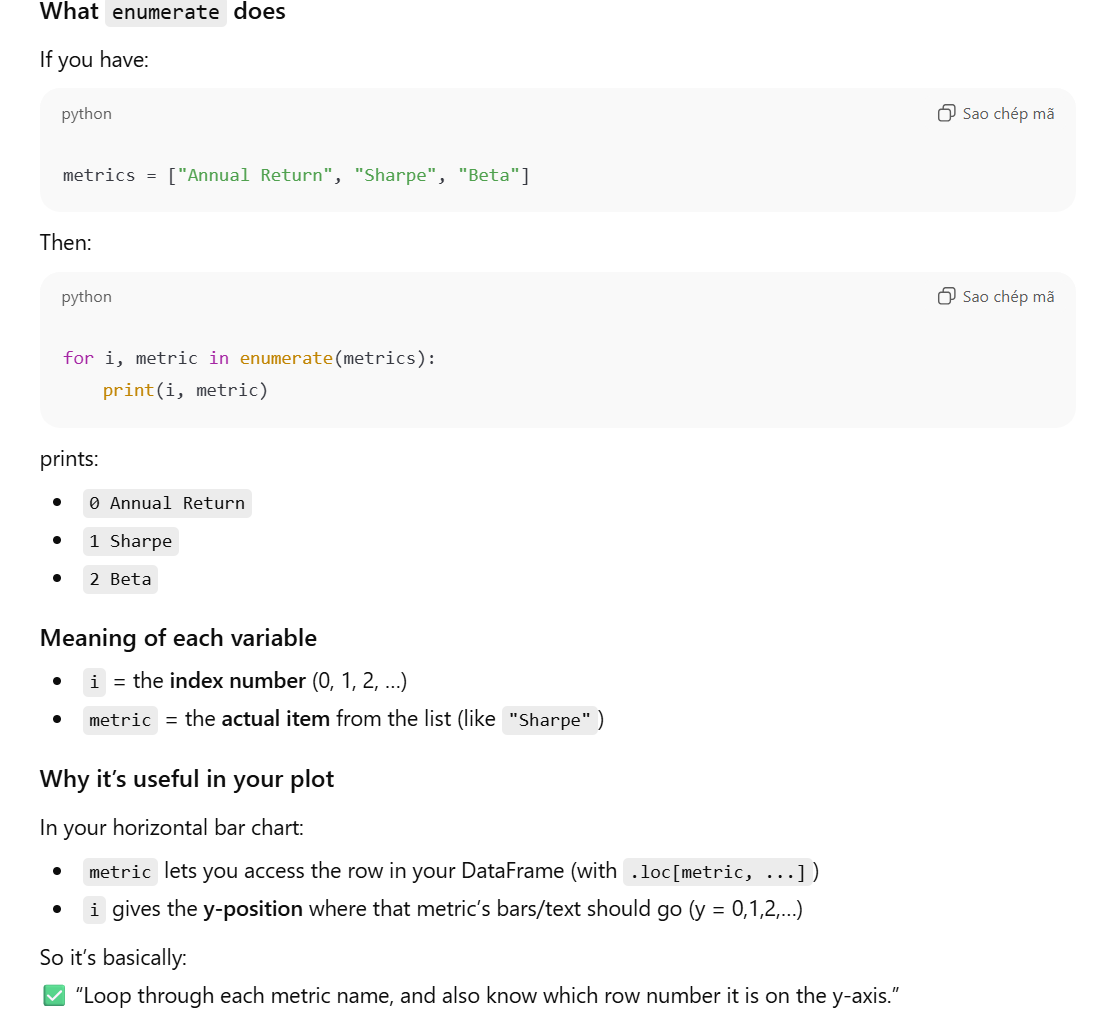

# !! The content below will only REUSE the PORTFOLIO TICKERS and NOTHING else
## => There will be new data range (longer dates) and completely new returns | both daily and now, monthly


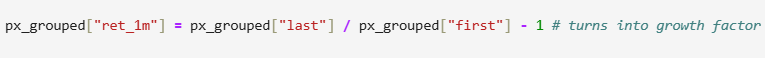
## ======================================================
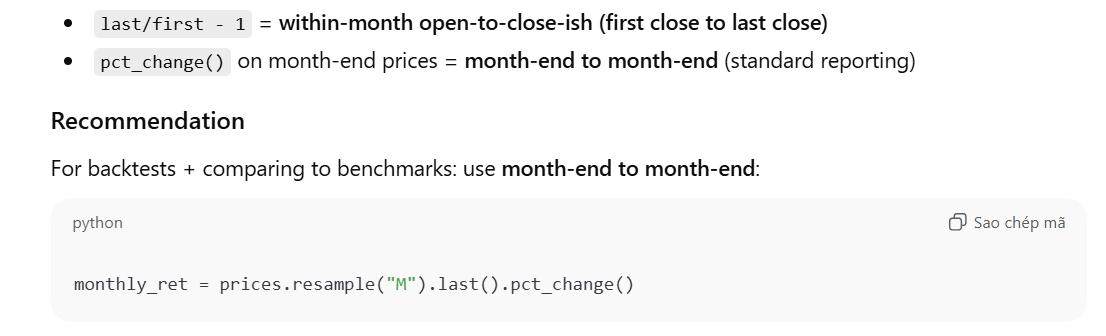
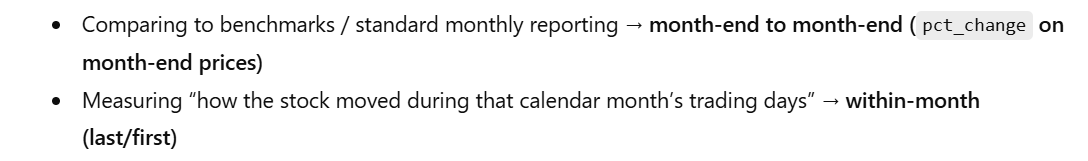
#### ====================================================================
# Important note:
## px_all.groupby("month").agg("last").reset_index()) is the same as ".resample("M").last()
#### -> .resample() is a groupby() but specifically for time-related datas (in this case, changing the date into months and group them up)

In [27]:
import warnings
warnings.filterwarnings("ignore")

def new_prices_time_range(ticker):
    output = yf.download(ticker, start = "2023-01-01", end = "", auto_adjust = True, progress = False)["Close"]
    return output
new_prices = new_prices_time_range(portfolio)

monthly_fw_backtest_last_price = new_prices.resample("ME").last()
monthly_returns_price = monthly_fw_backtest_last_price.pct_change()
##

new_daily_returns = new_prices.pct_change()
monthly_returns_price

Ticker,AAPL,COCO,GOOGL,MSFT,NFLX
Date,,,,,
2023-01-31,NaN,NaN,NaN,NaN,NaN
2023-02-28,0.023183,0.246131,-0.088830,0.009018,-0.089668
2023-03-31,0.118648,0.160260,0.151788,0.155882,0.072486
2023-04-30,0.028987,0.103466,0.034802,0.065765,-0.045010
2023-05-31,0.046058,0.232333,0.144681,0.071105,0.197921
2023-06-30,0.094330,0.007121,-0.025800,0.036999,0.114516
2023-07-31,0.012785,-0.016747,0.108772,-0.013567,-0.003451
2023-08-31,-0.042384,0.070780,0.025995,-0.022226,-0.012051
2023-09-30,-0.088678,-0.079533,-0.038995,-0.036643,-0.129312


In [28]:
new_daily_returns

Ticker,AAPL,COCO,GOOGL,MSFT,NFLX
Date,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN
2023-01-04,0.010314,0.030370,-0.011670,-0.043743,0.049025
2023-01-05,-0.010605,-0.007908,-0.021344,-0.029638,0.000937
2023-01-06,0.036794,-0.023188,0.013225,0.011785,0.018889
2023-01-09,0.004089,0.011869,0.007786,0.009736,-0.001204
...,...,...,...,...,...
2026-01-12,0.003393,0.012370,0.010013,-0.004382,-0.000559
2026-01-13,0.003074,-0.006649,0.012385,-0.013643,0.010178
2026-01-14,-0.004175,-0.059515,-0.000387,-0.023987,-0.019597


# Record of Recent datas and Market Movements -> deciding on signals and weights alocations based on recent returns

# Momentum Signal (Returns of the most recent 12 months skipping the most recent) -> monthly returns

In [29]:
# Similar to annual returns -> but monthly this time to identify short
def momentum_12_1_signal(monthly_rets, lookback=12, skip=1):
    window = monthly_rets.iloc[-(lookback + skip):] # Return the last (lookack +skip) rows, in this case = 12 + 1 = 13, note: this is counted from 1, not from 0 like an index -> so 13 rows
    window = window.iloc[:lookback]  # stops before lookback value, in this case, 12 -> return 12 rows from row 0 to row 11
    momentum = (1 + window).prod() - 1 # returns the total compounded growth (we needed to turn into the growth factor to include the compound effects
    return momentum

# usage: It’s a quick way to compute the classic momentum factor so you can rank and pick assets based on their recent trend.
# -> buy the top scores - sell the lower scores

momentum_score = momentum_12_1_signal(monthly_returns_price)
momentum_score_copy = momentum_score.copy()

# skipping the most recent month to avoid noise, compounding 12 months of returns

momentum_score_copy = pd.DataFrame(momentum_score_copy).sort_values(by = 0, ascending = True)
momentum_score_copy.rename(columns = {0: "Momentum Score"}).T

Ticker,NFLX,AAPL,MSFT,COCO,GOOGL
Momentum Score,0.051923,0.090526,0.155842,0.436196,0.659936


## ILOC[] in a nutshell
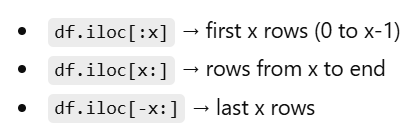

# Portfolio Risk balancing based on daily returns

In [30]:
def inv_vol_weights(daily_rets_train, vol_lookback_days=120): # Need look back days to catch up with the current trends / noise in the market 
                                                             # -> make the method less outdated since it is RECENT data
    daily_rets = daily_rets_train
    trailing = daily_rets.iloc[-vol_lookback_days:]
    vol = trailing.std()
    ###
    inv = (1/vol).replace([np.inf, -np.inf], np.nan).dropna() # inverse volatility score -> low score if vol is high and vice versa 
    weights = inv/inv.sum() # turn the said inverse volatility into % or weights spread accross the total portfolio (since inv.sum() is the value of the entire portfolio)
    return weights

vol_weights = inv_vol_weights(new_daily_returns)
vol_weights_copy = vol_weights.copy()

##
vol_weights_copy_df = pd.DataFrame(vol_weights_copy).rename(columns = {0: "Inverse Volatility Weights"})
vol_weights_copy_df

# Note on the usage: please consider the market news and changes (some of the stock could be rising quickly, thus deemed "high volatility", but not necessarily high risk, but rather stronger returns)

,Inverse Volatility Weights
Ticker,
AAPL,0.237068
COCO,0.123418
GOOGL,0.181770
MSFT,0.280350
NFLX,0.177393


# 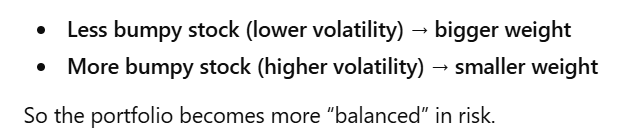

# Simple metrics

In [31]:
def annual_metrics(new_rets_daily):
    annual_ret = (1 + new_rets_daily).prod() ** (252/len(new_rets_daily)) - 1
    annual_volatility = new_rets_daily.std() * np.sqrt(252)
    ## 
    annual_sharpe = (new_rets_daily.mean() - rf_rates_daily) / new_rets_daily.std()
    ##
    cumret = (1 + new_rets_daily).cumprod()
    peak = cumret.cummax()
    dd = cumret / peak - 1
    max_dd = dd.min()
    ##
    output = {"Annual Returns": annual_ret, "Annual Volatility": annual_volatility, "Annual Shapre": annual_sharpe, "Max Drawdown": max_dd}
    return output

long_term_annual = annual_metrics(new_daily_returns)
##
long_term_annual_copy = long_term_annual.copy()
pd.DataFrame(long_term_annual)

,Annual Returns,Annual Volatility,Annual Shapre,Max Drawdown
Ticker,,,,
AAPL,0.272414,0.254785,0.057731,-0.333605
COCO,0.576226,0.448553,0.072388,-0.385485
GOOGL,0.544735,0.301187,0.092238,-0.298059
MSFT,0.250014,0.231688,0.057157,-0.237266
NFLX,0.434805,0.337257,0.070595,-0.342857


# Please consider the use of Weighing the portfolio before using conducting DATA OVERTIME

# 3rd Expansion. Volatility Prediction based on daily prices

In [39]:
new_daily_returns
new_weights_2 = {"AAPL": 0.237068,
"COCO": 0.123418,
"GOOGL": 0.181770,
"MSFT": 0.280350,
"NFLX": 0.177393}
new_w_2 = pd.Series(new_weights_2)
new_w_2


AAPL     0.237068
COCO     0.123418
GOOGL    0.181770
MSFT     0.280350
NFLX     0.177393
dtype: float64

In [40]:
new_portfolio_returns_2 = new_daily_returns[new_w_2.index].dropna()
new_portfolio_returns_2 = new_portfolio_returns_2.dot(new_w_2)
new_portfolio_returns_2

Date
2023-01-04    0.000506
2023-01-05   -0.015512
2023-01-06    0.014920
2023-01-09    0.006365
2023-01-10    0.011614
                ...   
2026-01-12    0.002824
2026-01-13    0.000140
2026-01-14   -0.018607
2026-01-15   -0.004205
2026-01-16   -0.000172
Length: 762, dtype: float64

# Volatility DataSet

In [52]:
def make_vol_dataset(ret, horizon=20):   # Daily Values
    df = pd.DataFrame({"ret": ret})

    # ----- Features (past information) -----
    df["ret_sq"]  = df["ret"]**2 #Highlights extreme moves

    # Realized volatility features (Rolling)
    df["vol_5"]   = df["ret"].rolling(5).std()
    df["vol_20"]  = df["ret"].rolling(20).std()
    df["vol_60"]  = df["ret"].rolling(60).std()

    # EWMA volatility (more responsive than rolling)
    df["ewma_20"] = df["ret"].ewm(span=20, adjust=False).std()

    # Return momentum-type features (sometimes useful) => smooths out recent returns
    df["rolling_ret_5"]  = df["ret"].rolling(5).mean()
    df["rolling_ret_20"] = df["ret"].rolling(20).mean()

    # ----- Target (future realized vol) -----
    # std of next horizon days (shifted backwards so target aligns at time t)
    df["fwd_vol"] = df["ret"].rolling(horizon).std().shift(-horizon)
    return df
vol_data_set_full = make_vol_dataset(new_portfolio_returns_2)
vol_data_set_shorten = vol_data_set_full.dropna()
vol_data_set_shorten

,ret,ret_sq,vol_5,vol_20,vol_60,ewma_20,rolling_ret_5,rolling_ret_20,fwd_vol
Date,,,,,,,,,
2023-03-30,0.003219,1.036388e-05,0.011152,0.014093,0.014792,0.013940,0.003576,0.005470,0.012213
2023-03-31,0.019745,3.898470e-04,0.012608,0.014174,0.014932,0.013988,0.004643,0.005551,0.011638
2023-04-03,0.004334,1.877936e-05,0.010104,0.014177,0.014713,0.013319,0.007346,0.005518,0.012281
2023-04-04,-0.002095,4.387263e-06,0.009030,0.013705,0.014667,0.012911,0.008056,0.006008,0.012868
2023-04-05,-0.000389,1.512093e-07,0.008666,0.013764,0.014674,0.012403,0.004963,0.005844,0.012960
...,...,...,...,...,...,...,...,...,...
2025-12-11,0.000942,8.866568e-07,0.006410,0.010407,0.009888,0.009588,-0.003620,-0.000001,0.006300
2025-12-12,-0.001882,3.541331e-06,0.006382,0.010127,0.009749,0.009129,-0.003692,0.000427,0.006295
2025-12-15,-0.010200,1.040399e-04,0.006703,0.010388,0.009566,0.009144,-0.003990,0.000039,0.007190


# HOW DOES SHIFTING WORK AND WHY DOES IT MAKE SENSE
#### Example: when shift(-1), we are moving the selected column up by 1 row (Pretty much pair the current data at month X with the result of the next month X+1! 
#### => This tells THE ALGORITHM THAT "with the current market data, the next month will be labeled distress or not" AND THEN IT USES THAT ALGORITHM AS THE INDEPENDENT VALUE to predict the next month's distress probability
## => because NOW what the model will predict is the present+1 date value (that's how we "predict the future"), we give future results present data to train it's foundation
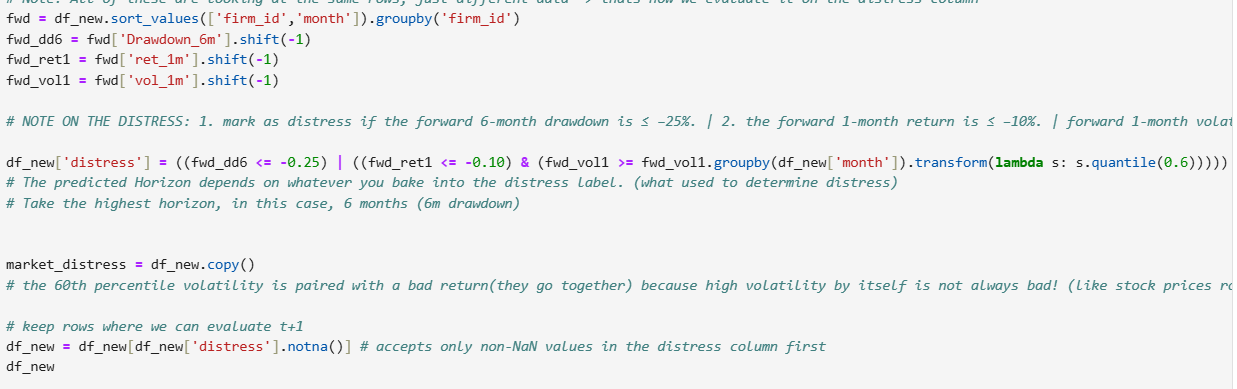
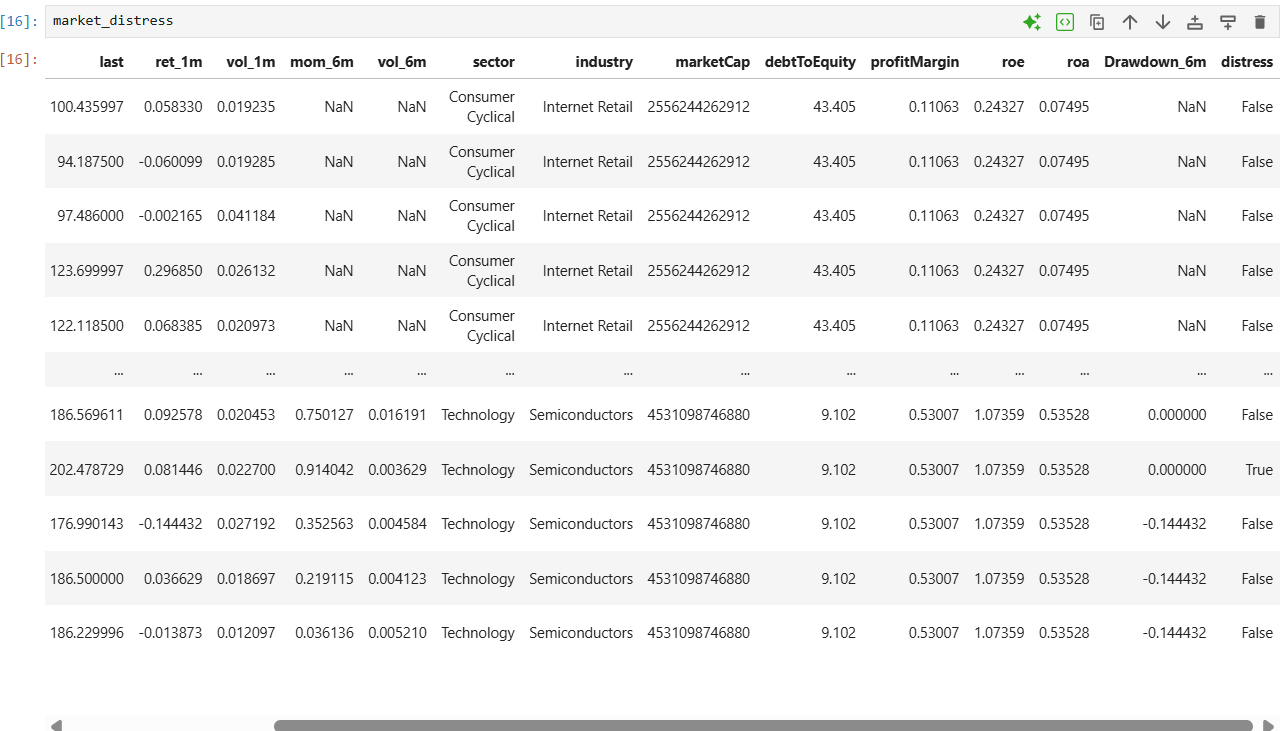
# 
# THE RESULT BELOW IS PRESENT + 1 MONTH (we shifted -1), so, the next month
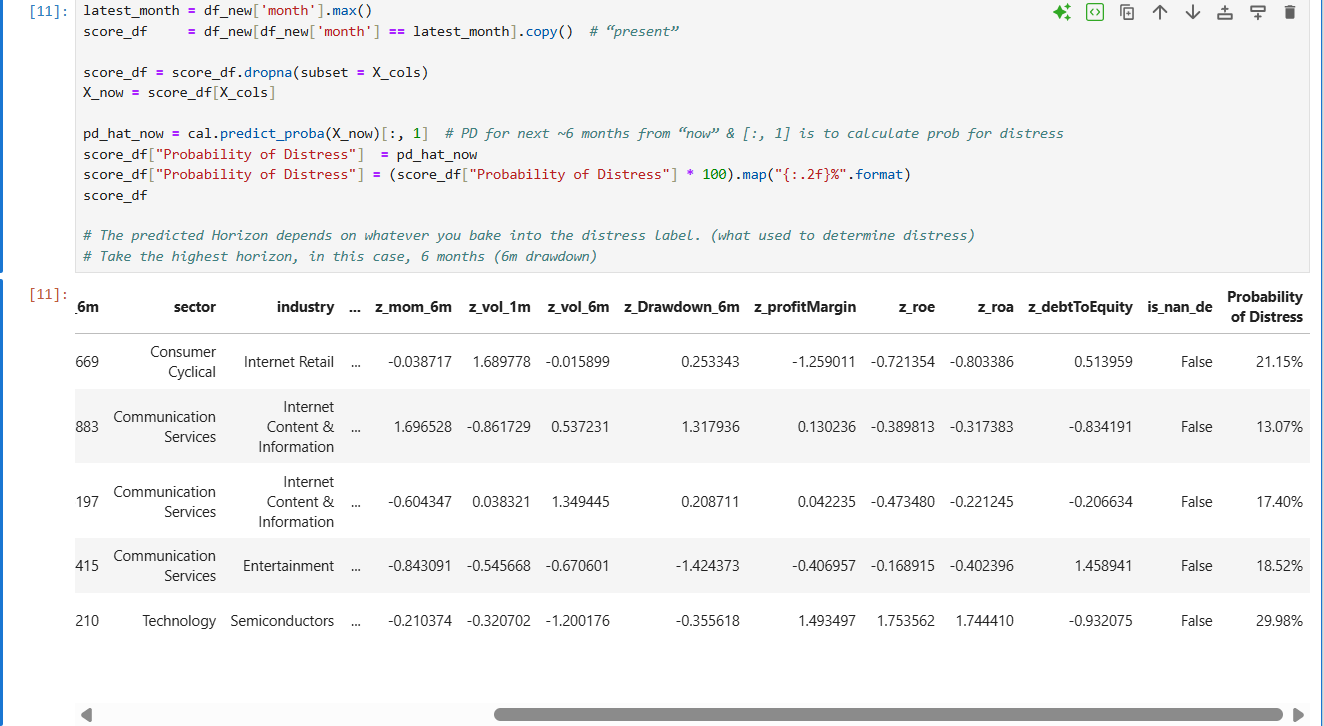